conda install -c conda-forge cvxpy

!conda config --remove channels 'https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/'

In [1]:
from cvxpy import *
import numpy as np
import cvxopt
import cvxpy as cvx

In [2]:
x = Variable(4)

sigma = np.array([[216, 70, -400, -20],
                  [70, 25, -150, -20],
                  [-400, -150, 1596, 50],
                  [-20, -20, 50, 100]])

risk = quad_form(x,sigma)

obj = Minimize(risk)

cons = [cvx.sum(x) == 1, x >= 0]

prob = Problem(obj, cons)
print(prob)

prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

minimize QuadForm(var0, [[ 216.   70. -400.  -20.]
 [  70.   25. -150.  -20.]
 [-400. -150. 1596.   50.]
 [ -20.  -20.   50.  100.]])
subject to Sum(var0, None, False) == 1.0
           0.0 <= var0
status: optimal
optimal value 5.211722581147349
optimal var [-1.86633808e-23  7.60955865e-01  6.94714719e-02  1.69572663e-01]


status: optimal
optimal value 560.6883412589483
optimal var [-6.53661571e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589494
optimal var [-1.72143877e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589502
optimal var [-4.08722066e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589502
optimal var [-4.08722066e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589502
optimal var [-4.54274587e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589502
optimal var [-4.54274587e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589502
optimal var [-4.54274587e-23  7.40109820e-01  6.71684956e-02  1.92721685e-01]
status: optimal
optimal value 560.6883412589502
optimal var [-4.54274587e-23  7.40109820e-01  6.71684956e-02  1.927216

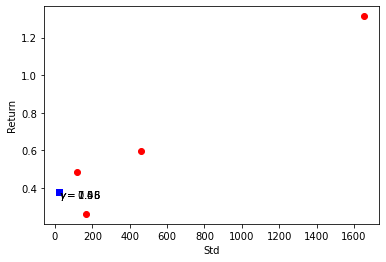

In [72]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

n = 4
mu = np.abs(np.random.randn(n, 1)) # 产生正态分布的样本点表示收益向量
Sigma = np.random.randn(n, n)

Sigma = Sigma.T@Sigma # 生成方差-协方差矩阵

def markowitz_portfolio():
    x = cvx.Variable(n) # n维权重向量
    gamma = cvx.Parameter(nonneg=True) # gamma值
    ret = mu.T@x # 收益
    risk = cvx.quad_form(x, Sigma) # 风险
    cons = [cvx.sum(x)==1, x>=0]
    prob = cvx.Problem(cvx.Maximize(ret - gamma*risk), cons)

    n_samples = 100
    v_risk, v_return = np.zeros(n_samples), np.zeros(n_samples)
    v_gamma = np.logspace(-2, 3, num=n_samples)

    for i in range(n_samples):
        gamma.value = v_gamma[i]
        prob.solve()
        print("status:", prob.status)
        print("optimal value", prob.value)
        print("optimal var", x.value)
        v_risk[i]=cvx.sqrt(risk).value
        v_return[i]=ret.value

    # plot
    plt.plot(v_risk, v_return, 'g-') # 有效前沿
    # 标注点
    markers_pos = [13, 43, 57]
    for i in markers_pos:
        plt.plot(v_risk[i], v_return[i], 'bs')
        plt.annotate('$\gamma={:.2f}$'.format(v_gamma[i]), xy=[v_risk[i]+0.08, v_return[i]-0.03])
    # 随机点
    for i in range(n):
        plt.plot(np.sqrt(Sigma[i, i]), mu[i], 'ro')

    plt.xlabel('Std')
    plt.ylabel('Return')
    plt.show()


def main():
    markowitz_portfolio()

if __name__ == '__main__':
    main()
